In [1]:
import numpy as np 
import seaborn as sns 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt 
import zipfile 
from pathlib import Path 

In [2]:
df = pd.read_csv("hour.csv")
dfc=df.copy(deep=True)
dfc.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Read in the data

dfc['dteday'] = pd.to_datetime(dfc['dteday'])

# Split train and test
train = dfc.iloc[:-int(len(dfc) * 0.2)]
test = dfc.iloc[-int(len(dfc) * 0.2):]

In [10]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing


In [15]:
def plot_func(forecast1: list[float],
              forecast2: list[float],
              forecast3: list[float],
              title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['dteday'], y=train["cnt"], name='Train'))
    fig.add_trace(go.Scatter(x=test['dteday'], y=test["cnt"], name='Train'))
    fig.add_trace(go.Scatter(x=test['dteday'], y=forecast1, name='Simple'))
    fig.add_trace(go.Scatter(x=test['dteday'], y=forecast2, name="Holt's Linear"))
    fig.add_trace(go.Scatter(x=test['dteday'], y=forecast3, name='Holt Winters'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')
    return fig.show()


# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train["cnt"]).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

# Fit Holt's model and get forecasts
model_holt = Holt(train["cnt"], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

# Fit Holt Winters model and get forecasts
model_holt_winters = ExponentialSmoothing(train["cnt"], trend='mul',
                                          seasonal='mul', seasonal_periods=24)\
                                          .fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(len(test))

# Plot the forecasts
plot_func(forecasts_simple, forecasts_holt, forecasts_holt_winters,  "Holt-Winters Exponential Smoothing")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [3]:
dfc["dteday"]=pd.to_datetime(dfc["dteday"])
dfc.loc[0,"dteday"].day_name()

'Saturday'

In [4]:
dfc["dteday"].max()

Timestamp('2012-12-31 00:00:00')

In [6]:
dfc["dteday"]=pd.to_datetime(dfc["dteday"])

dfc = dfc.rename(columns = {'dteday':'Date'})
dfc

def daily_count(df):
    new_dataframe = df[["Date", "cnt"]].copy()
    new_dataframe.set_index("Date", inplace=True)

    # Calculate the daily count by summing "casual" and "registered" for each day
    daily_count= new_dataframe.groupby(["Date"])[["cnt"]].sum()
    
    return daily_count


dfc = daily_count(dfc)

In [7]:
dfc=dfc.dropna()

In [8]:
dfc.head()

,cnt
Date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


In [12]:

wdfc = dfc.resample('W').mean()  # Change 'mean()' to your aggregation method


<AxesSubplot:xlabel='Date'>

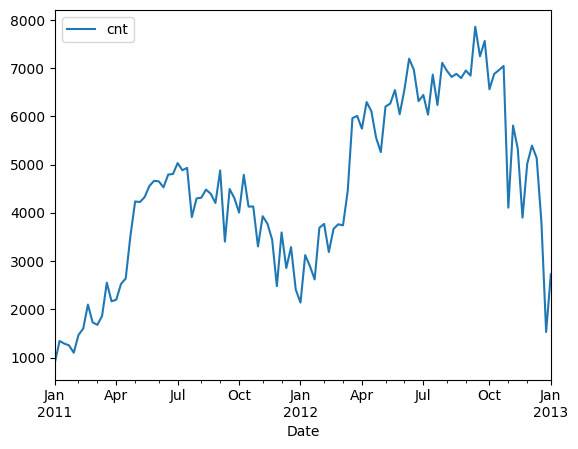

In [13]:
wdfc.plot()

In [14]:
wdfc['averagecount_1weekback']=wdfc['cnt'].shift(+1)
wdfc['averagecount_2weekback']=wdfc['cnt'].shift(+2)
wdfc['averagecount_3weekback']=wdfc['cnt'].shift(+3)


wdfc.head()

,cnt,averagecount_1weekback,averagecount_2weekback,averagecount_3weekback
Date,,,,
2011-01-02,893.000000,NaN,NaN,NaN
2011-01-09,1344.000000,893.000000,NaN,NaN
2011-01-16,1289.285714,1344.000000,893.000000,NaN
2011-01-23,1252.857143,1289.285714,1344.000000,893.0
2011-01-30,1099.857143,1252.857143,1289.285714,1344.0


In [15]:
wdfc=wdfc.dropna()


In [16]:

from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)



In [17]:

x1,x2,x3,y=wdfc['averagecount_1weekback'],wdfc['averagecount_2weekback'],wdfc['averagecount_3weekback'],wdfc['cnt']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

final_x=np.concatenate((x1,x2,x3),axis=1)

#print(final_x)
pd.DataFrame(final_x)

,0,1,2
0,1289.285714,1344.000000,893.000000
1,1252.857143,1289.285714,1344.000000
2,1099.857143,1252.857143,1289.285714
3,1467.571429,1099.857143,1252.857143
4,1598.857143,1467.571429,1099.857143
...,...,...,...
98,5019.571429,3902.142857,5328.428571
99,5394.571429,5019.571429,3902.142857
100,5138.000000,5394.571429,5019.571429
101,3813.714286,5138.000000,5394.571429


In [18]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]


In [19]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LinearRegression()

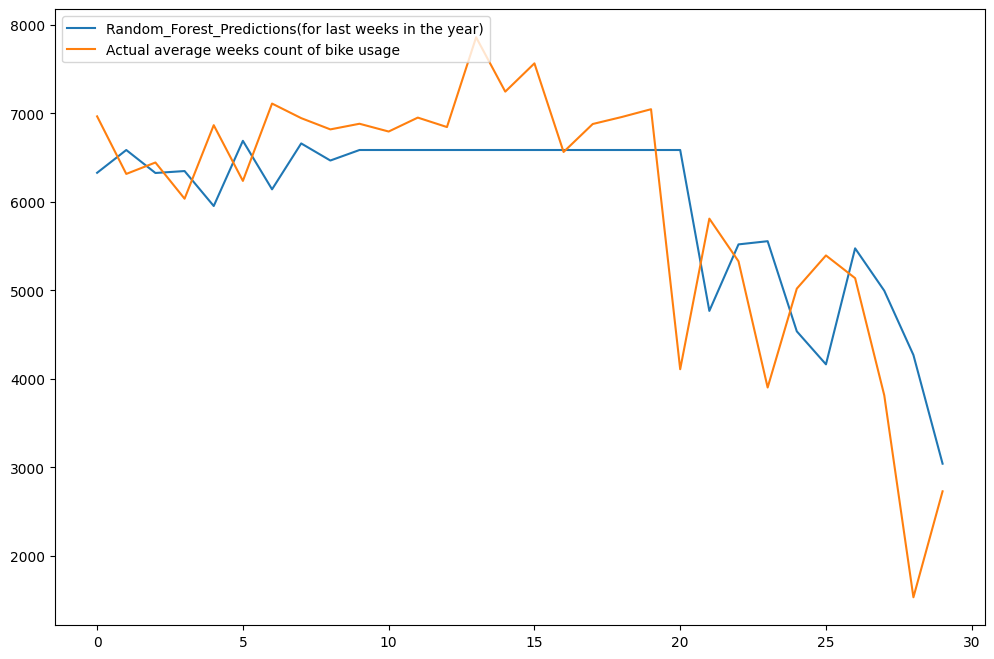

In [20]:
pred=model.predict(X_test)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions(for last weeks in the year)')
plt.plot(y_test,label='Actual average weeks count of bike usage')
plt.legend(loc="upper left")
plt.show()


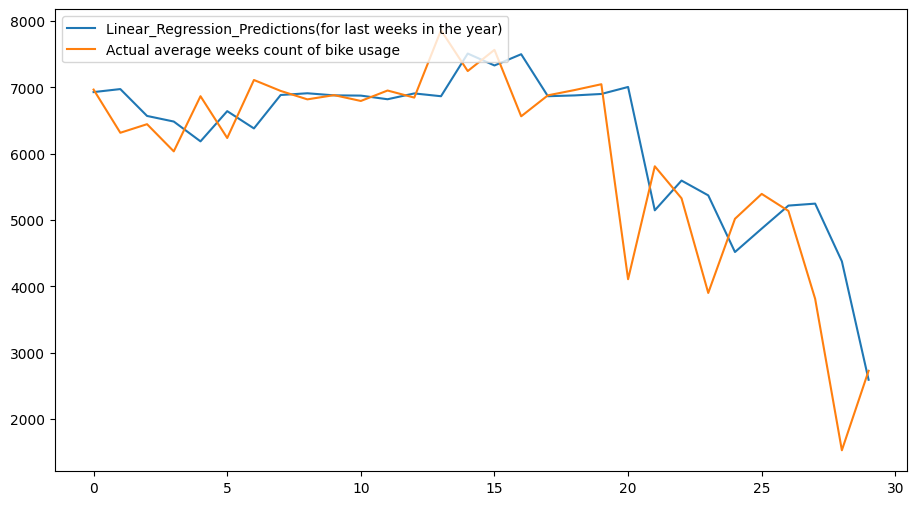

In [21]:
lin_pred=lin_model.predict(X_test)

plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions(for last weeks in the year)')
plt.plot(y_test,label='Actual average weeks count of bike usage ')
plt.legend(loc="upper left")
plt.show()

In [22]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [23]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)
print("Mean Value of Test Dataset:", y_test.mean())


Mean Squared Error for Random Forest Model is: 955.9305891177569
Mean Squared Error for Linear Regression Model is: 924.584122394409
Mean Value of Test Dataset: 6003.985714285715


In [24]:
print("R2 score for Random Forest Model =",r2_score(y_test, pred))
print("R2 score for Linear Regression Model=",r2_score(y_test, lin_pred))

R2 score for Random Forest Model = 0.574535389022172
R2 score for Linear Regression Model= 0.6019811992086657
